# Mac Miller Lyrics

__[Codecademy video about analyzing songs with Python](https://www.youtube.com/watch?v=wKW8z6zqCFo_)__

## Notes from the video

See Notion

## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
mac_df = pd.io.json.read_json(
    '/Users/kogimandias/DataScience/MusicLyrics/MacMiller/data/MacMillerLyrics.json')


In [3]:
mac_df.head()

,lyrics,metadata,url,annotations
0,"[When you're young, not much matters, When you...",{'title': 'Kickin’ Incredibly Dope Shit (Intro...,https://genius.com/Mac-miller-kickin-incredibl...,"[{'section': 'Intro: Telly & Mac Miller', 'sta..."
1,"[Do you mind if we smoke this blunt outside?, ...","{'title': 'Outside', 'album_title': 'K.I.D.S.'...",https://genius.com/Mac-miller-outside-lyrics,"[{'section': 'Chorus', 'start': 0, 'end': 4}, ..."
2,"[If you in the ride, turn the volume real high...","{'title': 'Get Em Up', 'album_title': 'K.I.D.S...",https://genius.com/Mac-miller-get-em-up-lyrics,"[{'section': 'Chorus', 'start': 0, 'end': 8}, ..."
3,"[Woah, Haha, yeah, And the Nikes on my feet ke...","{'title': 'Nikes on My Feet', 'album_title': '...",https://genius.com/Mac-miller-nikes-on-my-feet...,"[{'section': 'Intro: Mac Miller', 'start': 0, ..."
4,"[Kids, Kids, yeah, Haha, I'm just high, why th...","{'title': 'Senior Skip Day', 'album_title': 'K...",https://genius.com/Mac-miller-senior-skip-day-...,"[{'section': 'Intro', 'start': 0, 'end': 3}, {..."


We can see that we have two Series of dictionaries in our df, let's turn metadata object into a df

In [4]:
mac_meta = pd.DataFrame(list(mac_df.metadata))

We have way too many unnecessary columns so we create a new meta df that only contains valuable ones.

In [5]:
mac_meta = mac_meta[['title', 'album_title', 'written_by', 'release_date']]


For now, we only need the lyrics from mac_df.

In [6]:
mac_df = mac_df.lyrics

In [7]:
mac_df = pd.concat([mac_meta,mac_df], axis = 1)

Let's check our columns data types.

In [8]:
mac_df.dtypes

title           object
album_title     object
written_by      object
release_date    object
lyrics          object
dtype: object

We have only object types but title and album_title should be strings.
written_by should have the list of all writers involved.
release_date should be a datetime object.
lyrics should stay an object for now.

In [9]:
convert_dict = {'title': 'string', 'album_title': 'string', 'lyrics': 'string'}
mac_df.release_date = pd.to_datetime(mac_df.release_date)
mac_df = mac_df.astype(convert_dict)


In [10]:
mac_df.album_title.replace(to_replace= 'Balloonerism*', value = 'Balloonerism', inplace=True)

Let's drop all unreleased songs as they do not properly represent mac_df's work as well as some albums that don't interest me atm.

In [11]:
mac_df.drop(mac_df[mac_df.album_title ==
            'Live from London'].index, inplace=True)
mac_df.drop(mac_df[mac_df.album_title ==
            'Live from Space'].index, inplace=True)
mac_df.drop(mac_df[mac_df.album_title ==
            'Unreleased Songs'].index, inplace=True)
mac_df.drop(mac_df[mac_df.album_title ==
            'K.I.D.S. (Deluxe)'].index, inplace=True)
mac_df.drop(mac_df[mac_df.album_title ==
            'Spotify Singles'].index, inplace=True)
mac_df.drop(mac_df[mac_df.album_title ==
            'But My Mackin’ Ain’t Easy (Original Version)'].index, inplace=True)
mac_df.drop(mac_df[mac_df.album_title == 'Balloonerism'].index, inplace=True)
mac_df.drop(mac_df[mac_df.album_title ==
            'I Love Life, Thank You'].index, inplace=True)

mac_df.drop(mac_df[mac_df.title == 'Of The Soul Remix'].index, inplace=True)


We can see from the remaining songs that we have an album *Circles* and *Circles Deluxe*, it makes sense to merge them. <br>

In [12]:
mac_df.album_title.replace(to_replace= 'Circles (Deluxe)', value = 'Circles', inplace=True)

Let's drop for now anything published before his first official album **Blue slide park**

In [13]:
mac_df.drop(mac_df[mac_df.release_date <= '01-01-2011'].index, inplace=True)

In [14]:
counts = mac_df['album_title'].value_counts()

mac_df = mac_df[~mac_df['album_title'].isin(counts[counts < 5].index)]

Also, homogenize the dates of all songs from a same album.

In [15]:
print(set(mac_df.album_title))

{'Macadelic', 'Faces', 'Best Day Ever', 'Swimming', 'The Divine Feminine', 'Blue Slide Park', 'GO:OD AM ', 'Circles', 'Watching Movies with the Sound Off'}


__[multiindex to frame](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.to_frame.html)__

In [16]:
albums_dates = mac_df.groupby(by='album_title').release_date.value_counts()
# print(albums_dates)

real_albums_dates = albums_dates[albums_dates >
                                 3].index.to_frame().reset_index(drop=True)
print(real_albums_dates)


                          album_title release_date
0                       Best Day Ever   2011-11-03
1                     Blue Slide Park   2011-08-11
2                             Circles   2020-01-17
3                               Faces   2014-11-05
4                           GO:OD AM    2015-09-18
5                           Macadelic   2012-03-23
6                            Swimming   2018-03-08
7                 The Divine Feminine   2016-09-16
8  Watching Movies with the Sound Off   2013-06-18


In [17]:
mac_df = pd.merge(left=mac_df,
             right = real_albums_dates,
             on = 'album_title',
             how = 'left',
             ).drop('release_date_x', axis=1)

In [18]:
mac_df.release_date_y.rename('release_date', inplace=True)

0     2020-01-17
1     2020-01-17
2     2020-01-17
3     2020-01-17
4     2020-01-17
         ...    
143   2011-11-03
144   2011-11-03
145   2011-11-03
146   2011-11-03
147   2011-11-03
Name: release_date, Length: 148, dtype: datetime64[ns]

In [19]:
len(mac_df)

148

In [20]:
pd.options.display.max_colwidth=100

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
import nltk
from nltk.corpus import stopwords

In [23]:
stop_words = stopwords.words('english')

In [24]:
stop_words.extend(['im', 'aint', 'dont', 'thats', 'get', 'make', 'yeah', 'got', 'shit', 'like', 'cause', 'know', 'fuck', 'come', 'go', 'tell', 'keep', 'take', 'back',
                   'well', 'la', 'ima', 'oh', 'hey', 'cant', 'shes', 'boo', 'huh', 'ha', 'whoa', 'uh', 'da', 'yall', 'aha', 'haha', 'ah', 'ooh', 'way', 'let', 'em', 'yep', 'ones', 'ya', 'wanna',
                   'need', 'woo', 'nigga', 'yo', 'roll', 'put', 'gotta', 'mac', 'miller', 'gon', 'jerm', 'youre', 'lot', 'around', 'find', 'right', 'low', 'goes', 'ayy',
                   'ive', 'ill'])


TfidVectorizer can take a list of words to be removed as stop_words. min_df is the minimal frequency of a term in a document to be considered, max_df is its max.

In [25]:
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.05, max_df=0.95)

The lyrics we have in the dataframe are all part of a list rather than a string, we need to change the type of the data in order to apply the vectorizer to the lyrics.
Actually, the type is fine but the problem is that there are brackets that I guess are interpreted as a list by python. let's see if removing them helps. We can also already remove the backslashes and parentheses. We use regex so that all characters that are not alphanumerical are removed.

In [26]:
#df['name'].str.replace(r"\(.*\)","")
#test = mac_df['lyrics'].str.replace(r"\[*\]*\(*\)*\,*,*'*\"*\?*\!*","")
#test = test.replace("\ ","")
#test[1]

In [27]:
mac_df.lyrics = mac_df.lyrics.str.replace(r"\[*\]*\(*\)*\,*'*\"*\?*\!*\.*", "")
mac_df = mac_df.replace("\ ","")
#mac_df.lyrics = mac_df.lyrics.str.replace(r"\[*\]*", "")

/var/folders/qv/77qvv71j3gv0ktk3dnzvyzyw0000gn/T/ipykernel_52486/849002414.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mac_df.lyrics = mac_df.lyrics.str.replace(r"\[*\]*\(*\)*\,*'*\"*\?*\!*\.*", "")


In [28]:
mac_df.lyrics.head()

0    Well this is what it look like right before you fall Stumblin around youve been guessing your di...
1    Outside is cloudy but I like that better Better better Behind the wheel but still aint on my way...
2    Its a blue world without you Its a blue world alone Yeah well this a mad world it made me crazy ...
3    I spent the whole day in my head Do a little spring cleanin Im always too busy dreamin Well mayb...
4    Im so close I can taste it The man on the moon keep playing Practical jokes planting the mirrors...
Name: lyrics, dtype: string

In [29]:
tfidf = vectorizer.fit_transform(mac_df.lyrics)

# NLP

Following the video, we want to assign each album to a topic, how to assign a topic? Using a topic model.

A popular method is called __[LDA - Latend Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)__ .

Another one is __[NMF - Non-negative Matrix Factorization](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html)__

Those techniques will return a score for each topic in each document (song in this case). NMF will find the words automatically (note to self: look into the math behind)

In [30]:
from sklearn.decomposition import NMF

In [31]:
#nmf = NMF(n_components= mac_df.album_title.nunique())
nmf = NMF(n_components= 4)

n_components are the numbero of topics that we want to use. We can use the number of albums as the number of topics. <br>
In the video, it says it depends as topic modelling is mostly an art. We can look into that after we have a viable MVP.

In [32]:
topic_values = nmf.fit_transform(tfidf)

/Users/kogimandias/opt/anaconda3/envs/spotenv/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Now let's look into the words that have been chosen by nmf. code is from the video

In [33]:
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num+1)
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11:-1]])
    print(message)

Topic #1: time could baby good mind always okay away little alright
Topic #2: love feel girl forever son mind nothing someone pain waitin
Topic #3: bitch ass money real bitches drugs hoes motherfuckin goddamn top
Topic #4: life world party day happy nothin wake smile boy matter


/Users/kogimandias/opt/anaconda3/envs/spotenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
stop_words.extend(['im', 'aint', 'dont', 'thats', 'get', 'make', 'yeah', 'got', 'shit', 'like', 'cause', 'know', 'fuck', 'come', 'go', 'tell', 'keep', 'take', 'back',
                   'well', 'la', 'ima', 'oh', 'hey', 'cant', 'shes', 'boo', 'huh', 'ha', 'whoa', 'uh', 'da', 'yall', 'aha', 'haha', 'ah', 'ooh', 'way', 'let', 'em', 'yep', 'ones', 'ya', 'wanna',
                   'need', 'woo', 'nigga', 'yo', 'roll', 'put', 'gotta', 'mac', 'miller', 'gon', 'jerm', 'youre', 'lot', 'around', 'find', 'right', 'low', 'goes', 'ayy',
                   'ive', 'ill'])


We can see that most words are not adding context. Therefore, we can consider them as kind of *stopwords* and remove them. We can create a list and add them to the stopwords we had at the beginning.

In [35]:
topic_labels = ['mindful','love','egotrip','party']

In [36]:
df_topics = pd.DataFrame(topic_values, columns=topic_labels)

In [37]:
df_topics

,mindful,love,egotrip,party
0,0.138204,0.000000,0.000000,0.026252
1,0.149870,0.018173,0.000000,0.102869
2,0.123545,0.012009,0.028633,0.062067
3,0.240775,0.000000,0.000000,0.043966
4,0.000000,0.047411,0.041082,0.138942
...,...,...,...,...
143,0.038311,0.048640,0.023972,0.160179
144,0.013201,0.121358,0.078778,0.249318
145,0.000000,0.002074,0.072865,0.280173
146,0.081677,0.038355,0.082203,0.100701


We now have a score for each song and each topic. However, we would like to assign a song to only one (or maybe two) categories at most.

In [38]:
mac_df = mac_df.join(df_topics)

In [39]:
mac_df.loc[mac_df['mindful'] >= 0.1, 'mindful'] = 1
mac_df.loc[mac_df['love'] >= 0.1, 'love'] = 1
mac_df.loc[mac_df['egotrip'] >= 0.1, 'egotrip'] =1
mac_df.loc[mac_df['party'] >= 0.1, 'party'] = 1

In [40]:
mac_df.loc[mac_df['mindful'] < 0.1, 'party'] = 0
mac_df.loc[mac_df['love'] < 0.1, 'love'] = 0
mac_df.loc[mac_df['egotrip'] < 0.1, 'egotrip'] =0
mac_df.loc[mac_df['party'] < 0.1, 'party'] = 0

In [41]:
mac_df['year'] = mac_df.release_date_y.dt.year

In [42]:
year_topics = mac_df.groupby('album_title').mean().round(2).reset_index()

In [43]:
year_topics
year_topics = year_topics.sort_values(by= ['year'])

In [44]:

year_topics.drop('year',axis=1)

,album_title,mindful,love,egotrip,party
0,Best Day Ever,0.21,0.06,0.06,0.06
1,Blue Slide Park,0.43,0.12,0.29,0.12
5,Macadelic,0.44,0.24,0.41,0.00
8,Watching Movies with the Sound Off,0.29,0.16,0.47,0.05
3,Faces,0.36,0.04,0.46,0.00
4,GO:OD AM,0.50,0.06,0.47,0.12
7,The Divine Feminine,0.82,0.27,0.00,0.00
6,Swimming,0.93,0.08,0.15,0.00
2,Circles,0.86,0.14,0.00,0.14


In [45]:
import matplotlib.pyplot as plt

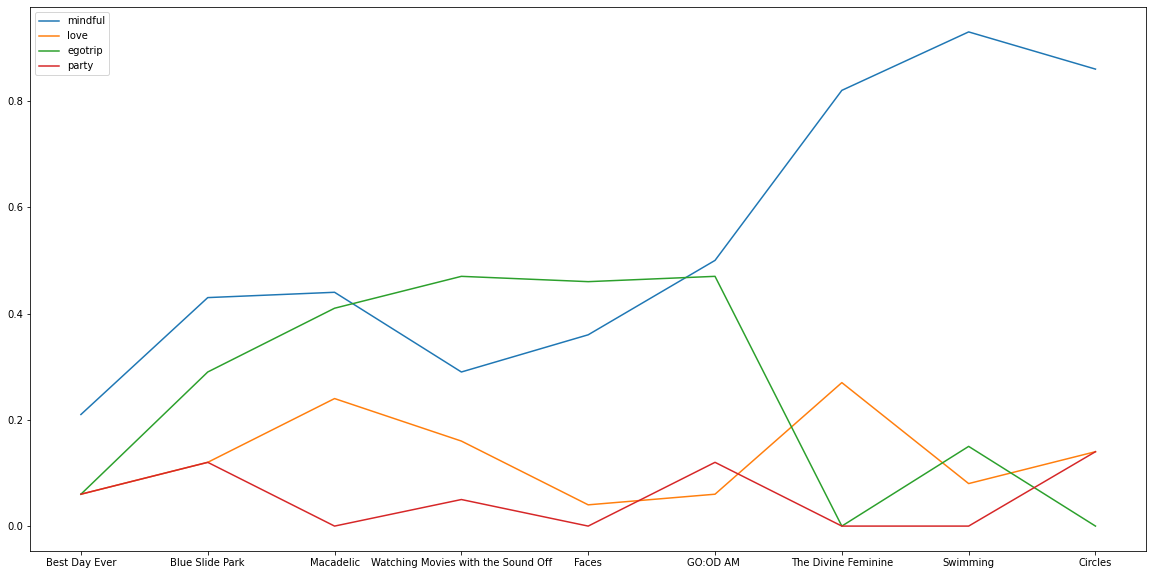

In [46]:
plt.figure(figsize=(20,10))
plt.plot(year_topics['album_title'], year_topics['mindful'],label = 'mindful')
plt.plot(year_topics['album_title'], year_topics['love'],label = 'love')
plt.plot(year_topics['album_title'], year_topics['egotrip'],label = 'egotrip')
plt.plot(year_topics['album_title'], year_topics['party'],label = 'party')

plt.legend()